# Scripts for the analysis in the paper

In [4]:
import sys
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from seaborn.algorithms import bootstrap
from seaborn.utils import ci
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from tmp.utils import formatter

form = FuncFormatter(formatter)

plt.rc('font', family='serif')
plt.rc('text', usetex=True)
sns.set(style="whitegrid", font="serif")
color_mine = ["#F8414A", "#5676A1", "#FD878D", "#385A89",  "#FFFACD", "#EFCC00"]

## Hateful users are power users

\#tweets/day
1.30840698479e-06
9.22013191376e-39
7.57270131087e-10
\#followers/day
0.0030395462365
1.16875996586e-19
9.79836328062e-17
\#followees/day
5.9320228245e-07
1.54603516408e-22
0.000465279331268
\#favorites
0.00907254276727
1.51127901598e-28
0.0786545400199
avg(interval)
9.69678829891e-08
0.163106105642
4.78372820766e-22


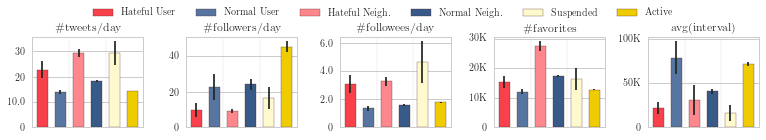

In [7]:
%matplotlib inline
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from seaborn.algorithms import bootstrap
from seaborn.utils import ci

from tmp.utils import formatter

form = FuncFormatter(formatter)

plt.rc('font', family='serif')
plt.rc('text', usetex=True)
sns.set(style="whitegrid", font="serif")
color_mine = ["#F8414A", "#5676A1", "#FD878D", "#385A89",  "#FFFACD", "#EFCC00"]

df = pd.read_csv("../data/users_neighborhood_anon.csv")
df = df[df["created_at"].notnull()]

f, axzs = plt.subplots(1, 5, figsize=(10.8, 2))
axzs = [axzs]
boxprops = dict(linewidth=0.3)
whiskerprops = dict(linewidth=0.3)
capprops = dict(linewidth=0.3)
medianprops = dict(linewidth=1)

df["tweet_number"] = df["tweet number"] / (df["tweet number"] + df["retweet number"] + df["quote number"])
df["created_at"] = -(df["created_at"] - datetime.datetime(2017, 12, 29).timestamp())/86400


df["statuses_count"] = df["statuses_count"] / df["created_at"]
df["followers_count"] = df["followers_count"] / df["created_at"]
df["followees_count"] = df["followees_count"] / df["created_at"]

attributes_all = [["statuses_count", "followers_count", "followees_count", "favorites_count", "time_diff"]]

titles_all = [["\#tweets/day", "\#followers/day", "\#followees/day", "\#favorites", "avg(interval)"]]

first = True
for axs, attributes, titles in zip(axzs, attributes_all, titles_all):

    for axis, attribute, title in zip(axs, attributes, titles):
        N = 6
        men = [df[df.hate == "hateful"],
               df[df.hate == "normal"],
               df[df.hate_neigh],
               df[df.normal_neigh],
               df[df.is_63_2 == True],
               df[df.is_63_2 == False]]
        tmp = []
        medians, medians_ci = [], []
        averages, averages_ci = [], []

        for category in men:
            boots = bootstrap(category[attribute], func=np.nanmean, n_boot=1000)
            ci_tmp = ci(boots)
            average = (ci_tmp[0] + ci_tmp[1]) / 2
            ci_average = (ci_tmp[1] - ci_tmp[0]) / 2
            averages.append(average)
            averages_ci.append(ci_average)
            boots = bootstrap(category[attribute], func=np.nanmedian, n_boot=1000)
            ci_tmp = ci(boots)
            median = (ci_tmp[0] + ci_tmp[1]) / 2
            ci_median = (ci_tmp[1] - ci_tmp[0]) / 2
            medians.append(median)
            medians_ci.append(ci_median)

            tmp.append(category[attribute].values)

        ind = np.array([0, 1, 2, 3, 4, 5])
        width = .6

        _, n_h = stats.ttest_ind(tmp[0], tmp[1], equal_var=False, nan_policy='omit')
        _, nn_nh = stats.ttest_ind(tmp[2], tmp[3], equal_var=False, nan_policy='omit')
        _, s_ns = stats.ttest_ind(tmp[4], tmp[5], equal_var=False, nan_policy='omit')

        print(title)
        print(n_h)
        print(nn_nh)
        print(s_ns)
        rects = axis.bar(ind, averages, width, yerr=averages_ci, color=color_mine,
                         ecolor="#212823", edgecolor=["#4D1A17"]*6, linewidth=.3)

        axis.yaxis.set_major_formatter(form)

        axis.set_xticks([])
        axis.set_title(title)
        axis.set_ylabel("")
        axis.set_xlabel("")
        axis.axvline(1.5, ls='dashed', linewidth=0.3, color="#C0C0C0")
        axis.axvline(3.5, ls='dashed', linewidth=0.3, color="#C0C0C0")

f.legend((rects[0], rects[1], rects[2], rects[3], rects[4], rects[5]),
         ('Hateful User', 'Normal User', 'Hateful Neigh.', 'Normal Neigh.', 'Suspended', 'Active'),
         loc='upper center',
         fancybox=True, shadow=True, ncol=6)
f.tight_layout(rect=[0, 0, 1, .95])

f.savefig("../imgs/activity.pdf")


## Hateful users have newer accounts

9.25491740078e-63
1.15333984637e-135
3.29117679686e-49


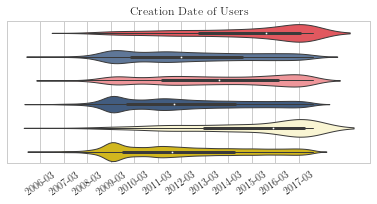

In [9]:
df = pd.read_csv("../data/users_neighborhood_anon.csv")
df = df[df["created_at"].notnull()]

men = [df[df.hate == "hateful"],
       df[df.hate == "normal"],
       df[df.hate_neigh],
       df[df.normal_neigh],
       df[df.is_63_2 == True],
       df[df.is_63_2 == False]]
tmp = []

for category in men:
    tmp.append(category["created_at"].values)

f, axs = plt.subplots(1, 1, figsize=(5.4, 3))
sns.violinplot(ax=axs, data=tmp, palette=color_mine, orient="h", linewidth=1)
axs.set_ylabel("")
axs.set_xlabel("")

_, n_h = stats.ttest_ind(men[0]["created_at"].values, men[1]["created_at"].values, equal_var=False)
_, nn_nh = stats.ttest_ind(men[2]["created_at"].values, men[3]["created_at"].values, equal_var=False)
_, s_ns = stats.ttest_ind(men[4]["created_at"].values, men[5]["created_at"].values, equal_var=False)
print(n_h)
print(nn_nh)
print(s_ns)

x = df.created_at.values
x_ticks = np.arange(min(x), max(x)+1, 3.154e+7)
axs.set_xticks(np.arange(min(x), max(x)+1, 3.154e+7))
f.canvas.draw()
axs.set_title("Creation Date of Users")

labels = [datetime.fromtimestamp(item).strftime('%Y-%m') for item in x_ticks]
axs.set_xticklabels(labels, rotation=35)
axs.set_yticklabels(["", "", "", ""], rotation=20)
f.tight_layout()

f.savefig("../imgs/created_at.pdf")


## Betweenness Centrality

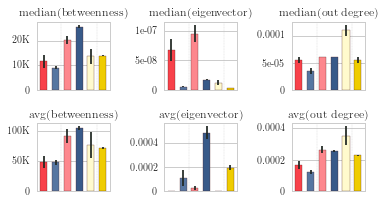

In [10]:
df = pd.read_csv("../data/users_neighborhood_anon.csv")

f, axzs = plt.subplots(2, 3, figsize=(5.4, 3))
boxprops = dict(linewidth=0.3)
whiskerprops = dict(linewidth=0.3)
capprops = dict(linewidth=0.3)
medianprops = dict(linewidth=1)


auxfs = [["median", "median", "median"],
        ["avg", "avg", "avg"]]

attributes_all = [["betweenness", "eigenvector", "out_degree"],
                  ["betweenness", "eigenvector", "out_degree"]]
titles_all = [["median(betweenness)", "median(eigenvector)", "median(out degree)"],
              ["avg(betweenness)", "avg(eigenvector)", "avg(out degree)"]]

rects = None
first = True
for axs, attributes, titles, auxf in zip(axzs, attributes_all, titles_all, auxfs):

    for axis, attribute, title, aux in zip(axs, attributes, titles, auxf):
        N = 4
        men = [df[df.hate == "hateful"],
               df[df.hate == "normal"],
               df[df.hate_neigh],
               df[df.normal_neigh],
               df[df.is_63_2 == True],
               df[df.is_63_2 == False]]
        tmp = []
        medians, medians_ci = [], []
        averages, averages_ci = [], []

        for category in men:
            boots = bootstrap(category[attribute], func=np.nanmean, n_boot=1000)
            ci_tmp = ci(boots)
            average = (ci_tmp[0] + ci_tmp[1]) / 2
            ci_average = (ci_tmp[1] - ci_tmp[0]) / 2
            averages.append(average)
            averages_ci.append(ci_average)
            boots = bootstrap(category[attribute], func=np.nanmedian, n_boot=1000)
            ci_tmp = ci(boots)
            median = (ci_tmp[0] + ci_tmp[1]) / 2
            ci_median = (ci_tmp[1] - ci_tmp[0]) / 2
            medians.append(median)
            medians_ci.append(ci_median)

            tmp.append(category[attribute].values)

        ind = np.array([0, 1, 2, 3, 4, 5])
        width = .6
        if aux == "median":
            rects = axis.bar(ind, medians, width, yerr=medians_ci, color=color_mine,
                             ecolor="#212823", edgecolor=["#4D1A17"]*6, linewidth=.3)
        if aux == "avg":
            rects = axis.bar(ind, averages, width, yerr=averages_ci, color=color_mine,
                             ecolor="#212823", edgecolor=["#4D1A17"]*6, linewidth=.3)

        axis.yaxis.set_major_formatter(form)

        axis.set_xticks([])
        axis.set_title(title)
        axis.set_ylabel("")
        axis.set_xlabel("")
        axis.axvline(1.5, ls='dashed', linewidth=0.3, color="#C0C0C0")
        axis.axvline(4.5, ls='dashed', linewidth=0.3, color="#C0C0C0")

    first = False

f.tight_layout(rect=[0, 0, 1, 1])

f.savefig("../imgs/betweenness.pdf")

## Empath Analysis

Sadness
4.59928230983e-17
6.68957424583e-38
0.070775263736
Swearing
2.33440660136e-22
1.98741908163e-32
0.00615175944043
Independence
5.39684317573e-27
9.5053023423e-30
9.41265622278e-09
Pos. Emotions
1.33855611651e-19
2.7555498154e-44
6.74475174243e-05
Neg. Emotions
7.19201752467e-06
5.78272874456e-05
0.491286532066
Government
3.90399002972e-32
4.9960283326e-55
0.370841711298
Love
4.74333645768e-05
2.38588702009e-09
0.636416101806
Ridicule
1.75970874069e-64
9.52926484057e-176
3.6741739172e-49
Masculine
7.47823177858e-14
3.57975364585e-15
0.000938812441153
Feminine
2.10582339129e-06
1.80531405789e-14
0.0210359579102
Violence
4.79154212183e-49
6.73998885586e-74
1.34540112895e-82
Suffering
2.32134980411e-09
2.09195927319e-31
4.16877136104e-07
Dispute
9.40341527901e-34
1.51459214533e-166
1.01577796349e-13
Anger
4.07511952376e-65
2.47682196596e-134
0.0878672239958
Envy
2.12983134579e-17
1.40984746093e-25
0.014531283826
Work
6.3027093896e-33
6.07932696595e-157
2.14395511415e-10
Politics
3.8

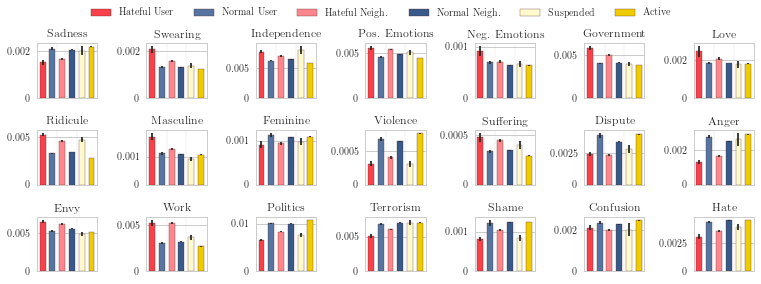

In [11]:
df = pd.read_csv("../data/users_neighborhood_anon.csv")

df["tweet_number"] = df["tweet number"] / (df["tweet number"] + df["retweet number"] + df["quote number"])
df["retweet_number"] = df["retweet number"] / (df["tweet number"] + df["retweet number"] + df["quote number"])
df["number_urls"] = df["number urls"] / (df["tweet number"] + df["retweet number"] + df["quote number"])
df["mentions"] = df["mentions"] / (df["tweet number"] + df["retweet number"] + df["quote number"])
df["mentions"] = df["mentions"] / (df["tweet number"] + df["retweet number"] + df["quote number"])
df["number hashtags"] = df["number hashtags"] / (df["tweet number"] + df["retweet number"] + df["quote number"])
df["baddies"] = df["baddies"] / (df["tweet number"] + df["retweet number"] + df["quote number"])

f, axzs = plt.subplots(3, 7, figsize=(10.8, 4))

attributes_all = [["sadness_empath", "swearing_terms_empath", "independence_empath",
                   "positive_emotion_empath", "negative_emotion_empath", "government_empath", "love_empath"],
                  ["ridicule_empath", "masculine_empath", "feminine_empath",
                   "violence_empath", "suffering_empath", "dispute_empath", "anger_empath"],
                  ["envy_empath", "work_empath", "politics_empath",
                   "terrorism_empath", "shame_empath", "confusion_empath", "hate_empath"]]

titles_all = [["Sadness", "Swearing", "Independence", "Pos. Emotions", "Neg. Emotions", "Government", "Love"],
              ["Ridicule", "Masculine", "Feminine", "Violence", "Suffering", "Dispute", "Anger"],
              ["Envy", "Work", "Politics", "Terrorism", "Shame", "Confusion", "Hate"]]

for axs, attributes, titles in zip(axzs, attributes_all, titles_all):

    for axis, attribute, title in zip(axs, attributes, titles):
        N = 4
        men = [df[df.hate == "hateful"],
               df[df.hate == "normal"],
               df[df.hate_neigh],
               df[df.normal_neigh],
               df[df.is_63_2 == True],
               df[df.is_63_2 == False]]
        tmp = []
        medians, medians_ci = [], []
        averages, averages_ci = [], []

        for category in men:
            boots = bootstrap(category[attribute], func=np.nanmean, n_boot=1000)
            ci_tmp = ci(boots)
            average = (ci_tmp[0] + ci_tmp[1]) / 2
            ci_average = (ci_tmp[1] - ci_tmp[0]) / 2
            averages.append(average)
            averages_ci.append(ci_average)
            boots = bootstrap(category[attribute], func=np.nanmedian, n_boot=1000)
            ci_tmp = ci(boots)
            median = (ci_tmp[0] + ci_tmp[1]) / 2
            ci_median = (ci_tmp[1] - ci_tmp[0]) / 2
            medians.append(median)
            medians_ci.append(ci_median)

            tmp.append(category[attribute].values)

        ind = np.array([0, 1, 2, 3, 4, 5])
        _, n_h = stats.ttest_ind(tmp[0], tmp[1], equal_var=False, nan_policy='omit')
        _, nn_nh = stats.ttest_ind(tmp[2], tmp[3], equal_var=False, nan_policy='omit')
        _, s_ns = stats.ttest_ind(tmp[4], tmp[5], equal_var=False, nan_policy='omit')

        print(title)
        print(n_h)
        print(nn_nh)
        print(s_ns)

        rects = axis.bar(ind, averages, 0.6, yerr=averages_ci, color=color_mine,
                         ecolor="#212823", edgecolor=["#4D1A17"] * 6, linewidth=.3)

        axis.yaxis.set_major_formatter(form)

        axis.set_xticks([])
        axis.set_title(title)
        axis.set_ylabel("")
        axis.set_xlabel("")
        axis.axvline(1.5, ls='dashed', linewidth=0.3, color="#C0C0C0")
        axis.axvline(3.5, ls='dashed', linewidth=0.3, color="#C0C0C0")

f.legend((rects[0], rects[1], rects[2], rects[3], rects[4], rects[5]),
         ('Hateful User', 'Normal User', 'Hateful Neigh.', 'Normal Neigh.', 'Suspended', 'Active'),
         loc='upper center',
         fancybox=True, shadow=True, ncol=6)
f.tight_layout(rect=[0, 0, 1, .95])
f.savefig("../imgs/lexical.pdf")


## Is Spam

/home/manoelribeiro/virtualenvs/abusive_users_osn/lib/python3.5/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in less


\#followers/followees
0.00376140316898
0.0579344722861
0.137782647802
\#URLs/tweet
2.64890758533e-12
4.07661000918e-55
1.78410080618e-44
hashtags/tweet
1.33004296047e-23
5.4597219754e-18
1.34075173758e-17


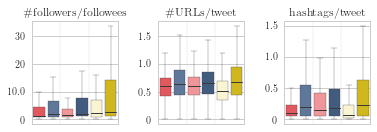

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from matplotlib.ticker import FuncFormatter

from tmp.utils import formatter

form = FuncFormatter(formatter)

plt.rc('font', family='serif')
plt.rc('text', usetex=True)
sns.set(style="whitegrid", font="serif")
color_mine = ["#F8414A", "#5676A1", "#FD878D", "#385A89",  "#FFFACD", "#EFCC00"]

df = pd.read_csv("../data/users_neighborhood_anon.csv")

df["followers_followees"] = df["followers_count"] / (df["followees_count"])
df["number_urls"] = df["number urls"] / (df["tweet number"] + df["retweet number"] + df["quote number"])
df["number hashtags"] = df["number hashtags"] / (df["tweet number"] + df["retweet number"] + df["quote number"])

f, axzs = plt.subplots(1, 3, figsize=(5.4, 2))
boxprops = dict(linewidth=0.3)
whiskerprops = dict(linewidth=0.3)
capprops = dict(linewidth=0.3)
medianprops = dict(linewidth=1)

attributes_all = [
    ["followers_followees", "number_urls", "number hashtags"]]

titles_all = [
    ["\#followers/followees", "\#URLs/tweet", "hashtags/tweet"]]


for axs, attributes, titles in zip([axzs], attributes_all, titles_all):

    for axis, attribute, title in zip(axs, attributes, titles):
        men = [df[df.hate == "hateful"],
               df[df.hate == "normal"],
               df[df.hate_neigh],
               df[df.normal_neigh],
               df[df.is_63_2 == True],
               df[df.is_63_2 == False]]

        tmp = []
        medians, medians_ci = [], []
        averages, averages_ci = [], []

        for category in men:

            w_inf = category[attribute].values
            non_inf = w_inf[w_inf < 1E308]
            tmp.append(non_inf)

        _, n_h = stats.ttest_ind(tmp[0], tmp[1], equal_var=False, nan_policy='omit')
        _, nn_nh = stats.ttest_ind(tmp[2], tmp[3], equal_var=False, nan_policy='omit')
        _, ns_ns2 = stats.ttest_ind(tmp[4], tmp[5], equal_var=False, nan_policy='omit')

        print(title)
        print(n_h)
        print(nn_nh)
        print(ns_ns2)

        rects = sns.boxplot(data=tmp, palette=color_mine, showfliers=False, ax=axis, orient="v", width=0.8,
                            boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, medianprops=medianprops)

        axis.yaxis.set_major_formatter(form)

        axis.set_xticks([])
        axis.set_title(title)
        axis.set_ylabel("")
        axis.set_xlabel("")
        axis.axvline(1.5, ls='dashed', linewidth=0.3, color="#C0C0C0")
        axis.axvline(3.5, ls='dashed', linewidth=0.3, color="#C0C0C0")


f.tight_layout(rect=[0, 0, 1, 1])

f.savefig("../imgs/spam.pdf")

## Sentiment

sentiment
8.07762995893e-116
1.383877874e-320
2.36089327378e-82
subjectivity
5.47014265607e-22
1.35096037889e-11
3.22185365655e-05
bad words
2.05364087502e-11
4.92386996268e-37
7.19552289152e-27


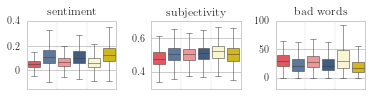

In [13]:
df = pd.read_csv("../data/users_neighborhood_anon.csv")

f, axzs = plt.subplots(1, 3, figsize=(5.4, 1.5))
axzs = [axzs]
boxprops = dict(linewidth=0.3)
whiskerprops = dict(linewidth=0.3)
capprops = dict(linewidth=0.3)
medianprops = dict(linewidth=1)

attributes_all = [["sentiment", "subjectivity", "baddies"]]
titles_all = [["sentiment", "subjectivity", "bad words"]]

rects = None
first = True
for axs, attributes, titles in zip(axzs, attributes_all, titles_all):

    for axis, attribute, title in zip(axs, attributes, titles):
        N = 4
        men = [df[df.hate == "hateful"],
               df[df.hate == "normal"],
               df[df.hate_neigh],
               df[df.normal_neigh],
               df[df["is_63_2"] == True],
               df[df["is_63_2"] == False]]
        tmp = []
        medians, medians_ci = [], []
        averages, averages_ci = [], []

        for category, color in zip(men, color_mine):
            tmp.append(category[attribute].values)

        sns.boxplot(data=tmp, palette=color_mine, showfliers=False, ax=axis, orient="v", width=0.8, linewidth=.5)

        ind = np.array([0, 1, 2, 3])
        _, n_h = stats.ttest_ind(tmp[0], tmp[1], equal_var=False, nan_policy='omit')
        _, nn_nh = stats.ttest_ind(tmp[2], tmp[3], equal_var=False, nan_policy='omit')
        _, ns_ns2 = stats.ttest_ind(tmp[4], tmp[5], equal_var=False, nan_policy='omit')

        print(title)
        print(n_h)
        print(nn_nh)
        print(ns_ns2)

        axis.yaxis.set_major_formatter(form)

        axis.set_xticks([])
        axis.set_title(title)
        axis.set_ylabel("")
        axis.set_xlabel("")
        axis.axvline(1.5, ls='dashed', linewidth=0.3, color="#C0C0C0")
        axis.axvline(3.5, ls='dashed', linewidth=0.3, color="#C0C0C0")

        axzs[0][0].set_ylim(-.15, .4)
        axzs[0][1].set_ylim(.30, .70)
        axzs[0][2].set_ylim(-20, 100)

        f.tight_layout(rect=[0, 0, 1, 1])

        f.savefig("../imgs/sentiment.pdf")

## Mixing

In [ ]:
from networkx.algorithms.assortativity import attribute_mixing_dict
import networkx as nx
import pandas as pd

g = nx.read_graphml("../data/users_clean.graphml")
df = pd.read_csv("../data/users_neighborhood_anon.csv")

hate_dict = {}
susp_dict = {}
for idv, hate, susp in zip(df.user_id.values, df.hate.values, df.is_63_2.values):
    hate_dict[str(idv)] = hate
    susp_dict[str(idv)] = susp

nx.set_node_attributes(g, name="hate", values=hate_dict)
nx.set_node_attributes(g, name="susp", values=susp_dict)

mixing = attribute_mixing_dict(g, "hate")

print(mixing)
print(" hate  -> hate   ", mixing["hateful"]["hateful"] /
      (mixing["hateful"]["other"] + mixing["hateful"]["normal"] + mixing["hateful"]["hateful"]) / (544 / 100386))
print(" hate  -> normal ", mixing["hateful"]["normal"] /
      (mixing["hateful"]["other"] + mixing["hateful"]["normal"] + mixing["hateful"]["hateful"]) / (4427 / 100386))
print("normal -> normal ", mixing["normal"]["normal"] /
      (mixing["normal"]["other"] + mixing["normal"]["normal"] + mixing["normal"]["hateful"]) / (4427 / 100386))
print("normal -> hate   ", mixing["normal"]["hateful"] /
      (mixing["normal"]["other"] + mixing["normal"]["normal"] + mixing["normal"]["hateful"]) / (544 / 100386))

mixing = attribute_mixing_dict(g, "susp")
print(mixing)
print(" susp  -> susp   ", mixing[True][True] / (mixing[True][True] + mixing[True][False]) / (668 / 100386))
print(" susp  -> active ", mixing[True][False] / (mixing[True][True] + mixing[True][False]) / (99718 / 100386))
print("active -> active ", mixing[False][False] / (mixing[False][True] + mixing[False][False]) / (99718 / 100386))
print("active -> susp   ", mixing[False][True] / (mixing[False][True] + mixing[False][False]) / (668 / 100386))

del g

df = pd.read_csv("../data/users_anon.csv")

men = [df[df.hate == "hateful"],
       df[df.hate == "normal"],
       df[df.hate_neigh],
       df[df.normal_neigh],
       df[df.is_63_2 == True],
       df[df.is_63_2 == False]]

for i in men:
    print(len(i.values))

confusion = [len(df[(df["hate"] == "hateful") & (df["is_63"])].index),
             len(df[(df["hate"] == "normal") & (df["is_63"])].index),
             len(df[(df["hate"] == "other") & (df["is_63"])].index)]

print(confusion)

confusion_norm = [confusion[0] / len(df[df["hate"] == "hateful"]),
                  confusion[1] / len(df[df["hate"] == "normal"]),
                  confusion[2] / len(df[df["hate"] == "other"])
                  ]

print(confusion_norm)